# Image Processing Project 

### Reading in data

#### Importing images and converting to grayscale

In [1]:
# Import libraries needed for image segmentation and plotting
import matplotlib.pyplot as plt
import matplotlib.image as pltimage
from skimage.morphology import remove_small_objects
from skimage import measure
from skimage import filters
from scipy import ndimage
import numpy as np
import ipywidgets as widgets
import time
import cv2
from activity8_tools import *
%matplotlib inline

# Loading in image
image1 = cv2.imread("C:\\Users\\Katrina Peralta\\Downloads\\brain_avm-axial.jpeg")

# Renaming 
axial = image1

# Display image
plt.figure(figsize=(10,5))
plt.imshow(axial, cmap='gray')
plt.title('Axial Plane')
plt.axis('on')
plt.show()

ImportError: DLL load failed while importing cv2: The specified module could not be found.

### Details of image

#### Image array size

In [16]:
# Printing array size for each image
axial_size = axial.shape
print(f'Axial Size = ', axial_size)

Axial Size =  (630, 630, 3)


#### Voxel resolution

In [17]:
# Converting from dpi to mm for all three planes
dpi = 96
slice_thickness = 0.8   # mm
pixel_size = 25.4/dpi
voxel_resolution = (pixel_size, pixel_size, slice_thickness)
print(f'Voxel Resolution (mm) = {voxel_resolution}')

Voxel Resolution (mm) = (0.26458333333333334, 0.26458333333333334, 0.8)


#### Plotting histogram

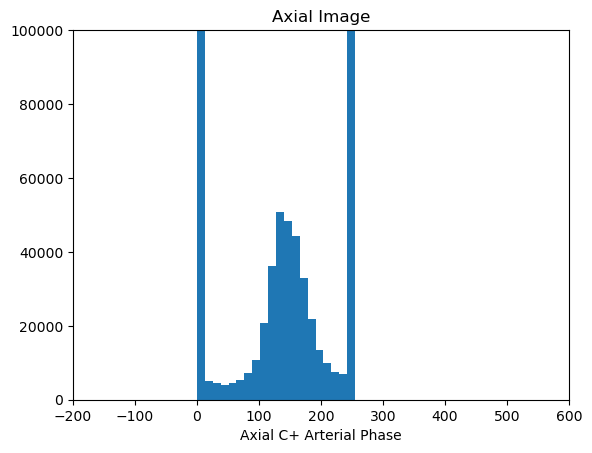

In [18]:
# Plotting histogram of intensities
plt.hist(np.ravel(axial),bins = 20)
plt.xlim(-200,600)
plt.ylim(0,100000)
plt.xlabel('Axial C+ Arterial Phase')
plt.title('Axial Image')
plt.show()

### Defining threshold and masking image

Time numpy: 0.0 seconds for array of size (630, 630, 3)


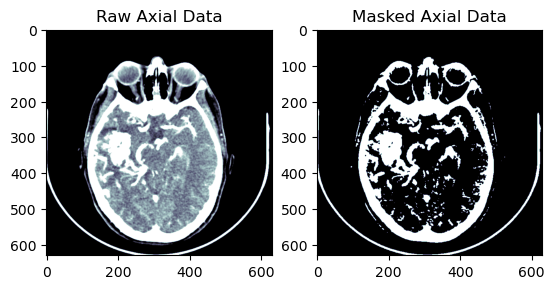

In [19]:
# Masking image from threshold
def threshold_py(image, threshold):
    '''
    Python (numpy) implementation of thresholding n-dimensional images
    '''
    return image > threshold

# Set threshold as determined by standardised processing protocols
threshold = 185 #### DIY

# Now we will generate a boolean mask of the original dataset where the entries
# are True where voxel intensity is >threshold and False where voxel intensity is <threshold.
start = time.time()
axial_masked = threshold_py(axial, threshold)

# This 'print()' line below contains a formatted string (f'...')
# - these formatted strings are a pythonic way to quickly output variables by typing them like {var}
print(f'Time numpy: {round(time.time()-start, 4)} seconds for array of size {axial_masked.shape}')

#Plot the results using matplotlib
# Axial
fig, ax = plt.subplots(1,2)

#Here we select the first image (0) of the entire z-stack to display
ax[0].imshow(axial[:,:,0], cmap=plt.cm.bone)
ax[0].set_title(f'Raw Axial Data')
ax[1].imshow(axial_masked[:,:,0], cmap=plt.cm.bone)
ax[1].set_title(f'Masked Axial Data')
plt.show()

### Cleaning up images and filtering out small objects

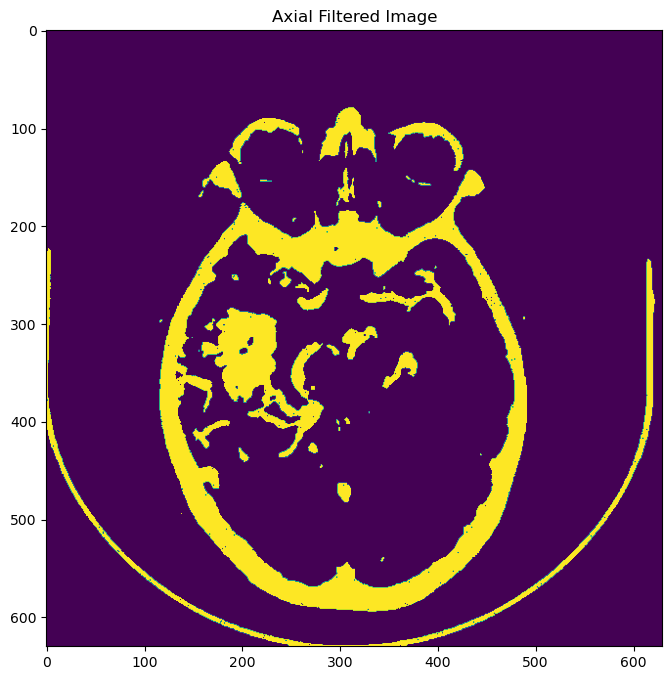

In [20]:
axial = {}
axial['raw axial'] = cv2.imread("C:\\Users\\Katrina Peralta\\Downloads\\brain_avm-axial.jpeg")

# Convert .jpg image from rbg (3-layer array) to greyscale (1-layer array). This array will now have pixel instensities from 0 to 255.
axial['grayscale'] = axial['raw axial'].dot([0.07, 0.72, 0.21])

# Defining a threshold
axial['thresholded']  = threshold_py(axial['grayscale'], 253) # threshold 'grey_image'
plt.figure(figsize=(8,8))
plt.imshow(axial['thresholded'])
plt.title('Axial Filtered Image')
plt.show()

# Before moving on to the segmentation (morphological operation) 
# We will clean up the image to remove small pixels
axial['thresholded filtered'] = remove_small_objects(axial['thresholded'])

### Morphological operators

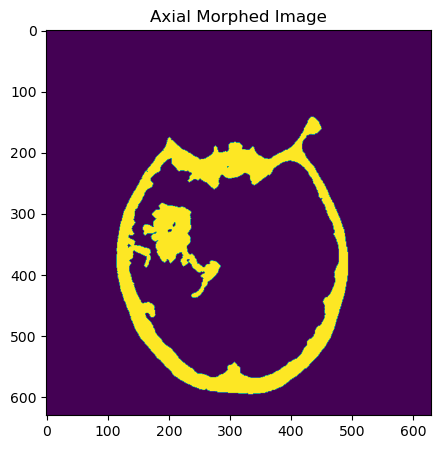

In [40]:
# Morphological operators
axial['morphed'] = ndimage.binary_erosion(axial['thresholded filtered'], iterations = 1)
axial['morphed2'] = remove_small_objects(axial['morphed'], min_size = 5000)
axial['morphed3'] = ndimage.binary_dilation(axial['morphed2'], iterations = 2)

# Plotting new image
plt.figure(figsize=(10,5))
plt.imshow(axial['morphed3'])
plt.title('Axial Morphed Image')
plt.show()

### Component labeling

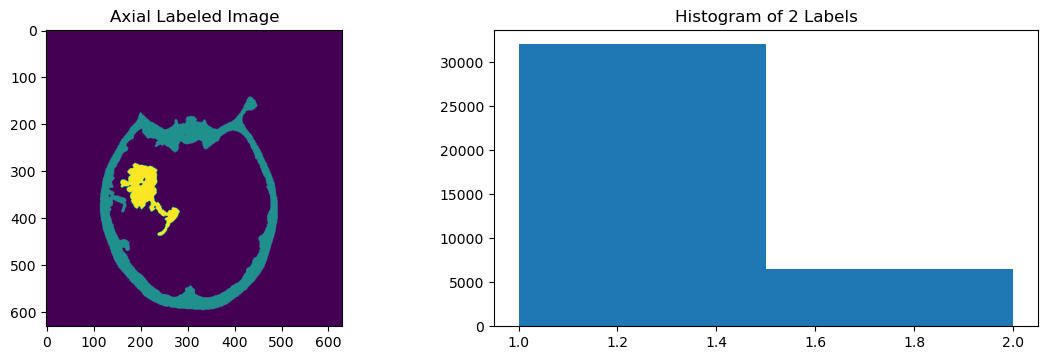

In [45]:
# Component labeling
axial['labeled'] = measure.label(axial['morphed3'])
max_label = np.amax(axial['labeled'])

# Plotting labeled image and histogram
fig, axes = plt.subplots(1,2,figsize=(12,4))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.8, wspace=0.05)
axes[0].imshow(axial['labeled'].astype(int))
axes[1].hist(axial['labeled'].ravel(), bins=max_label, range=(1,max_label))
axes[0].set_title('Axial Labeled Image')
axes[1].set_title(f'Histogram of {max_label} Labels')
plt.show()